<a href="https://colab.research.google.com/github/visheshagrawal/Course-Computer-Vision/blob/main/CV_OtsuAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

In [ ]:
img = cv2.imread("cv_hw2.jpg")

In [ ]:
flatten_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
flatten_gray=gray.flatten()

In [ ]:
min = float('inf')
threshold = -1
for i in range(1,256):
  before_num = (flatten_gray < i).sum()
  after_num = (flatten_gray >= i).sum()

  before_var = flatten_gray[flatten_gray < i].var()
  after_var = flatten_gray[flatten_gray >= i].var()

  curr_sum = before_num*before_var + after_num*after_var
  if(curr_sum<min):
    min = curr_sum
    threshold = i
  
  if(i==93):
    print(before_num,after_num,before_var,after_var)
  
print(threshold)
print(min)

478031 131569 325.6552031012335 1927.702353539153
93
409299153.3464786


In [ ]:
#Assumption 1
if flatten_gray[flatten_gray.shape[0]//2][flatten_gray.shape[1]//2] > threshold:
  token="before"
else:
  token="after"

In [ ]:
#Assumption 2
before_count=0
after_count=0
for i in range(flatten_gray.shape[1]):
  if flatten_gray[flatten_gray.shape[0]-1][i] > threshold:
    after_count+=1
  else:
    before_count+=1

for i in range(flatten_gray.shape[1]):
  if flatten_gray[0][i] > threshold:
    after_count+=1
  else:
    before_count+=1

for i in range(flatten_gray.shape[0]):
  if flatten_gray[i][0] > threshold:
    after_count+=1
  else:
    before_count+=1

for i in range(flatten_gray.shape[0]):
  if flatten_gray[i][flatten_gray.shape[1]-1] > threshold:
    after_count+=1
  else:
    before_count+=1


In [ ]:
if before_count>=after_count:
  token="before"
else:
  token="after"

In [ ]:
# To make the background blue
if token=="before":
  for i in range(flatten_gray.shape[0]):
    for j in range(flatten_gray.shape[1]):
      if (flatten_gray[i][j]<threshold):
        img[i][j][0]=255
        img[i][j][1]=0
        img[i][j][2]=0
        
elif token=="after":
  for i in range(flatten_gray.shape[0]):
    for j in range(flatten_gray.shape[1]):
      if (flatten_gray[i][j]>threshold):
        img[i][j][0]=255
        img[i][j][1]=0
        img[i][j][2]=0

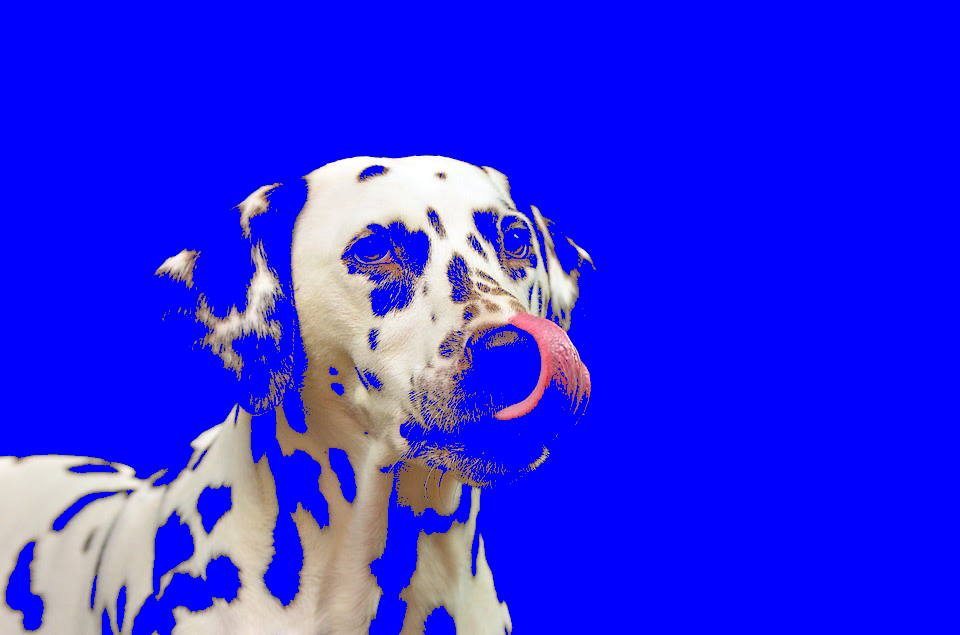

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)